In [1]:
import pandas as pd

In [6]:
tips = pd.read_csv("datasets/tips.csv")

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
df = tips.copy()

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
lits = df.columns

In [19]:
lits

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [21]:

for a in lits:
    print(df[a].unique())
    

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59 10.63 50.8

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [27]:
#결측치 확인
print(type(df.isna().sum(axis=0)))
df.isna().sum(axis=0)

<class 'pandas.core.series.Series'>


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
#중복된 데이터 확인하기
df.duplicated().sum()

1

In [53]:
#중복된 데이터 확인하기
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [50]:
df[df['total_bill']==13.00]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [52]:
df.duplicated(keep=False)

2

In [54]:
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [55]:
df.shape

(244, 7)

In [56]:
df.drop_duplicates(keep='first').shape

(243, 7)

In [57]:
df = df.drop_duplicates(keep='first')
df.shape

(243, 7)

In [58]:
import seaborn as sns

<AxesSubplot:>

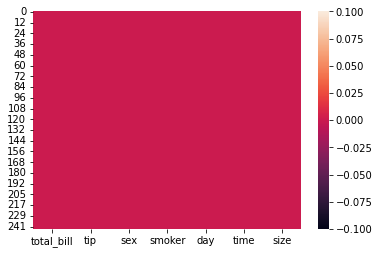

In [60]:
## 결측치 데이터

sns.heatmap(df.isnull())

In [65]:
x = [df[df['smoker']=='Yes'].smoker.count(),df[df['smoker']=='No'].smoker.count()]

In [69]:
y = df['smoker'].unique()

In [70]:
y

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

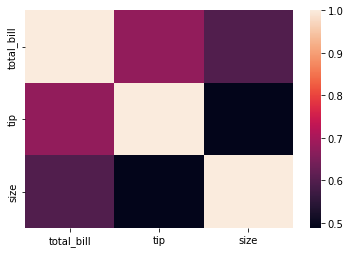

In [76]:
sns.heatmap(df.corr())

In [77]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000
